# Market Basket Analysis - 2023

In [8]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
#import warnings
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
#warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [11]:
# Load the dataset
df = pd.read_csv('online_retail.csv')

In [12]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [13]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['Invoice'], inplace=True)
df['Invoice'] = df['Invoice'].astype('str')
df = df[~df['Invoice'].str.contains('C')]

There is a little cleanup, we need to do. First, some of the descriptions have spaces that need to be removed. We’ll also drop the rows that don’t have invoice numbers and remove the credit transactions (those with invoice numbers containing C).

After the cleanup, we need to consolidate the items into 1 transaction per row with each product 1 hot encoded. For the sake of keeping the data set small, I’m only looking at sales for France. However, in additional code below, I will compare these results to sales from Germany. Further country comparisons would be interesting to investigate.

# Sales for France 

In [14]:
basket = (df[df['Country'] =="France"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

In [15]:
basket  #just France

Description,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP SUKI AND FRIENDS,WRAP WINTER FOREST,"WRAP, CAROUSEL",YELLOW BREAKFAST CUP AND SAUCER,YELLOW RED FLOWER PIGGY BANK,YOU'RE CONFUSING ME METAL SIGN,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
489883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After the cleanup, we need to consolidate the items into 1 transaction per row with each product 1 hot encoded. For the sake of keeping the data set small, I’m only looking at sales for France. 

There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0. This step will complete the one hot encoding of the data and remove the postage column (since that charge is not one we wish to explore):

In [16]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [17]:
basket_sets

Description,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP SUKI AND FRIENDS,WRAP WINTER FOREST,"WRAP, CAROUSEL",YELLOW BREAKFAST CUP AND SAUCER,YELLOW RED FLOWER PIGGY BANK,YOU'RE CONFUSING ME METAL SIGN,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
489883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that the data is structured properly, we can generate frequent item sets that have a support of at least 7%

In [18]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

D:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


The final step is to generate the rules with their corresponding support, confidence and lift:

In [19]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE),(CIRCUS PARADE LUNCH BOX),0.161826,0.116183,0.070539,0.435897,3.751832,0.051738,1.566767
1,(CIRCUS PARADE LUNCH BOX),(PLASTERS IN TIN CIRCUS PARADE),0.116183,0.161826,0.070539,0.607143,3.751832,0.051738,2.133535
2,(SPACEBOY LUNCH BOX),(CIRCUS PARADE LUNCH BOX),0.132780,0.116183,0.087137,0.656250,5.648438,0.071710,2.571105
3,(CIRCUS PARADE LUNCH BOX),(SPACEBOY LUNCH BOX),0.116183,0.132780,0.087137,0.750000,5.648437,0.071710,3.468880
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.087137,0.132780,0.070539,0.809524,6.096726,0.058969,4.552905
5,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.132780,0.087137,0.070539,0.531250,6.096726,0.058969,1.947441
6,(LUNCH BAG RED SPOTTY),(RED/WHITE DOT MINI CASES),0.136929,0.186722,0.070539,0.515152,2.758923,0.044972,1.677386
7,(RED/WHITE DOT MINI CASES),(LUNCH BAG RED SPOTTY),0.186722,0.136929,0.070539,0.377778,2.758923,0.044972,1.387078
8,(ROUND SNACK BOXES SET OF 4 FRUITS),(LUNCH BAG RED SPOTTY),0.145228,0.136929,0.070539,0.485714,3.547186,0.050653,1.678193
9,(LUNCH BAG RED SPOTTY),(ROUND SNACK BOXES SET OF 4 FRUITS),0.136929,0.145228,0.070539,0.515152,3.547186,0.050653,1.762967


We can filter the dataframe using standard pandas code. In this case, look for a large lift (6) and high confidence (.8):

In looking at the rules, it seems that the green and red alarm clocks are purchased together and the red paper cups, napkins and plates are purchased together in a manner that is higher than the overall probability would suggest.

In [20]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.087137,0.13278,0.070539,0.809524,6.096726,0.058969,4.552905
34,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.120332,0.13278,0.099585,0.827586,6.232759,0.083607,5.029876


In [21]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE),(CIRCUS PARADE LUNCH BOX),0.161826,0.116183,0.070539,0.435897,3.751832,0.051738,1.566767
1,(CIRCUS PARADE LUNCH BOX),(PLASTERS IN TIN CIRCUS PARADE),0.116183,0.161826,0.070539,0.607143,3.751832,0.051738,2.133535
2,(SPACEBOY LUNCH BOX),(CIRCUS PARADE LUNCH BOX),0.132780,0.116183,0.087137,0.656250,5.648438,0.071710,2.571105
3,(CIRCUS PARADE LUNCH BOX),(SPACEBOY LUNCH BOX),0.116183,0.132780,0.087137,0.750000,5.648437,0.071710,3.468880
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.087137,0.132780,0.070539,0.809524,6.096726,0.058969,4.552905
5,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.132780,0.087137,0.070539,0.531250,6.096726,0.058969,1.947441
6,(LUNCH BAG RED SPOTTY),(RED/WHITE DOT MINI CASES),0.136929,0.186722,0.070539,0.515152,2.758923,0.044972,1.677386
7,(RED/WHITE DOT MINI CASES),(LUNCH BAG RED SPOTTY),0.186722,0.136929,0.070539,0.377778,2.758923,0.044972,1.387078
8,(ROUND SNACK BOXES SET OF 4 FRUITS),(LUNCH BAG RED SPOTTY),0.145228,0.136929,0.070539,0.485714,3.547186,0.050653,1.678193
9,(LUNCH BAG RED SPOTTY),(ROUND SNACK BOXES SET OF 4 FRUITS),0.136929,0.145228,0.070539,0.515152,3.547186,0.050653,1.762967


In [22]:
basket['PLASTERS IN TIN CIRCUS PARADE'].sum()

792.0

In [23]:
basket['CIRCUS PARADE LUNCH BOX'].sum()

461.0

Here you can see number of sales for best selling item and number of sale of item that is purchased with most selling item. 
So You can see that customer is buying item A and almost 50% of the time he will get item B which is consequents.

# How does it goes with sales in Germany? 

In [24]:
basket2 = (df[df['Country'] =="Germany"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules2[ (rules2['lift'] >= 4) &
        (rules2['confidence'] >= 0.5)]

D:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BIG DOUGHNUT FRIDGE MAGNETS),(SAVE THE PLANET COTTON TOTE BAG),0.089337,0.089337,0.051873,0.580645,6.499480,0.043892,2.171581
1,(SAVE THE PLANET COTTON TOTE BAG),(BIG DOUGHNUT FRIDGE MAGNETS),0.089337,0.089337,0.051873,0.580645,6.499480,0.043892,2.171581
2,(BIG DOUGHNUT FRIDGE MAGNETS),(STRAWBERRY CERAMIC TRINKET BOX),0.089337,0.077810,0.057637,0.645161,8.291517,0.050686,2.598900
3,(STRAWBERRY CERAMIC TRINKET BOX),(BIG DOUGHNUT FRIDGE MAGNETS),0.077810,0.089337,0.057637,0.740741,8.291517,0.050686,3.512557
4,(BIG DOUGHNUT FRIDGE MAGNETS),(WOODLAND DESIGN COTTON TOTE BAG),0.089337,0.144092,0.051873,0.580645,4.029677,0.039000,2.041011
6,(PINK SPOTTY CUP),(BLUE SPOTTY CUP),0.074928,0.080692,0.051873,0.692308,8.579670,0.045827,2.987752
7,(BLUE SPOTTY CUP),(PINK SPOTTY CUP),0.080692,0.074928,0.051873,0.642857,8.579670,0.045827,2.590202
9,(BLUE SPOTTY CUP),(RED SPOTTY CUP),0.080692,0.129683,0.063401,0.785714,6.058730,0.052936,4.061479
10,(RED SPOTTY BOWL),(BLUE SPOTTY BOWL),0.089337,0.066282,0.057637,0.645161,9.733520,0.051715,2.631386
11,(BLUE SPOTTY BOWL),(RED SPOTTY BOWL),0.066282,0.089337,0.057637,0.869565,9.733520,0.051715,6.981748


In [25]:
basket['SAVE THE PLANET COTTON TOTE BAG'].sum()   #item A

62.0

In [26]:
basket['BIG DOUGHNUT FRIDGE MAGNETS'].sum()    #item B

312.0

Conclusion
So from this you can see that person which buys item A will buy with 500% buy item B. 

# Lets See data for UK

In [27]:
basket2 = (df[df['Country'] =="United Kingdom"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

In [28]:
basket2

Description,*Boombox Ipod Classic,*USB Office Glitter Lamp,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,...,wet & rotting,wet and rotting,wet cartons,wet ctn,wet damages,wet/smashed/unsellable,wonky bottom/broken,wrong code,wrong ctn size,wrong invc
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A506401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [30]:
basket_sets 

Description,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP SUKI AND FRIENDS,WRAP WINTER FOREST,"WRAP, CAROUSEL",YELLOW BREAKFAST CUP AND SAUCER,YELLOW RED FLOWER PIGGY BANK,YOU'RE CONFUSING ME METAL SIGN,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
489883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

D:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [32]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE),(CIRCUS PARADE LUNCH BOX),0.161826,0.116183,0.070539,0.435897,3.751832,0.051738,1.566767
1,(CIRCUS PARADE LUNCH BOX),(PLASTERS IN TIN CIRCUS PARADE),0.116183,0.161826,0.070539,0.607143,3.751832,0.051738,2.133535
2,(SPACEBOY LUNCH BOX),(CIRCUS PARADE LUNCH BOX),0.132780,0.116183,0.087137,0.656250,5.648438,0.071710,2.571105
3,(CIRCUS PARADE LUNCH BOX),(SPACEBOY LUNCH BOX),0.116183,0.132780,0.087137,0.750000,5.648437,0.071710,3.468880
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.087137,0.132780,0.070539,0.809524,6.096726,0.058969,4.552905
5,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.132780,0.087137,0.070539,0.531250,6.096726,0.058969,1.947441
6,(LUNCH BAG RED SPOTTY),(RED/WHITE DOT MINI CASES),0.136929,0.186722,0.070539,0.515152,2.758923,0.044972,1.677386
7,(RED/WHITE DOT MINI CASES),(LUNCH BAG RED SPOTTY),0.186722,0.136929,0.070539,0.377778,2.758923,0.044972,1.387078
8,(ROUND SNACK BOXES SET OF 4 FRUITS),(LUNCH BAG RED SPOTTY),0.145228,0.136929,0.070539,0.485714,3.547186,0.050653,1.678193
9,(LUNCH BAG RED SPOTTY),(ROUND SNACK BOXES SET OF 4 FRUITS),0.136929,0.145228,0.070539,0.515152,3.547186,0.050653,1.762967


In [33]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.087137,0.13278,0.070539,0.809524,6.096726,0.058969,4.552905
34,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.120332,0.13278,0.099585,0.827586,6.232759,0.083607,5.029876


In [34]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE),(CIRCUS PARADE LUNCH BOX),0.161826,0.116183,0.070539,0.435897,3.751832,0.051738,1.566767
1,(CIRCUS PARADE LUNCH BOX),(PLASTERS IN TIN CIRCUS PARADE),0.116183,0.161826,0.070539,0.607143,3.751832,0.051738,2.133535
2,(SPACEBOY LUNCH BOX),(CIRCUS PARADE LUNCH BOX),0.132780,0.116183,0.087137,0.656250,5.648438,0.071710,2.571105
3,(CIRCUS PARADE LUNCH BOX),(SPACEBOY LUNCH BOX),0.116183,0.132780,0.087137,0.750000,5.648437,0.071710,3.468880
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.087137,0.132780,0.070539,0.809524,6.096726,0.058969,4.552905
5,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.132780,0.087137,0.070539,0.531250,6.096726,0.058969,1.947441
6,(LUNCH BAG RED SPOTTY),(RED/WHITE DOT MINI CASES),0.136929,0.186722,0.070539,0.515152,2.758923,0.044972,1.677386
7,(RED/WHITE DOT MINI CASES),(LUNCH BAG RED SPOTTY),0.186722,0.136929,0.070539,0.377778,2.758923,0.044972,1.387078
8,(ROUND SNACK BOXES SET OF 4 FRUITS),(LUNCH BAG RED SPOTTY),0.145228,0.136929,0.070539,0.485714,3.547186,0.050653,1.678193
9,(LUNCH BAG RED SPOTTY),(ROUND SNACK BOXES SET OF 4 FRUITS),0.136929,0.145228,0.070539,0.515152,3.547186,0.050653,1.762967


Another way of showing result

In [35]:
# Print the results   
print("Frequent itemsets:\n", frequent_itemsets)
print("\nAssociation rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Frequent itemsets:
      support                                           itemsets
0   0.116183                       (ASSORTED COLOUR MINI CASES)
1   0.091286                     (BAKING SET 9 PIECE RETROSPOT)
2   0.091286               (CHILDS BREAKFAST SET CIRCUS PARADE)
3   0.116183                          (CIRCUS PARADE LUNCH BOX)
4   0.087137                             (DOLLY GIRL LUNCH BOX)
..       ...                                                ...
57  0.070539  (RED SPOTTY CHARLOTTE BAG, WOODLAND CHARLOTTE ...
58  0.078838  (RED TOADSTOOL LED NIGHT LIGHT, RED/WHITE DOT ...
59  0.087137  (RED TOADSTOOL LED NIGHT LIGHT, ROUND SNACK BO...
60  0.095436  (ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC...
61  0.099585  (SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...

[62 rows x 2 columns]

Association rules:
                              antecedents  \
0        (PLASTERS IN TIN CIRCUS PARADE)   
1              (CIRCUS PARADE LUNCH BOX)   
2                   (SPACEBOY LUNCH 

In [36]:
basket_sets ['PLASTERS IN TIN CIRCUS PARADE'].sum()   #item A

39

In [37]:
basket_sets ['CIRCUS PARADE LUNCH BOX'].sum()   #item B

28

# Summary: So customer buying item A will on 70+% buy item B

# Visualisation 

In [5]:
import pandas as pd

In [40]:
# Save the rules to a CSV file
rules.to_csv("output_rule.csv", index=False)

In [47]:
# Load the output rules
df=pd.read_csv('output_rule.csv')

In [48]:
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,frozenset({'PLASTERS IN TIN CIRCUS PARADE'}),frozenset({'CIRCUS PARADE LUNCH BOX'}),0.161826,0.116183,0.070539,0.435897,3.751832,0.051738,1.566767
1,frozenset({'CIRCUS PARADE LUNCH BOX'}),frozenset({'PLASTERS IN TIN CIRCUS PARADE'}),0.116183,0.161826,0.070539,0.607143,3.751832,0.051738,2.133535
2,frozenset({'SPACEBOY LUNCH BOX'}),frozenset({'CIRCUS PARADE LUNCH BOX'}),0.132780,0.116183,0.087137,0.656250,5.648438,0.071710,2.571105
3,frozenset({'CIRCUS PARADE LUNCH BOX'}),frozenset({'SPACEBOY LUNCH BOX'}),0.116183,0.132780,0.087137,0.750000,5.648437,0.071710,3.468880
4,frozenset({'DOLLY GIRL LUNCH BOX'}),frozenset({'SPACEBOY LUNCH BOX'}),0.087137,0.132780,0.070539,0.809524,6.096726,0.058969,4.552905
5,frozenset({'SPACEBOY LUNCH BOX'}),frozenset({'DOLLY GIRL LUNCH BOX'}),0.132780,0.087137,0.070539,0.531250,6.096726,0.058969,1.947441
6,frozenset({'LUNCH BAG RED SPOTTY'}),frozenset({'RED/WHITE DOT MINI CASES'}),0.136929,0.186722,0.070539,0.515152,2.758923,0.044972,1.677386
7,frozenset({'RED/WHITE DOT MINI CASES'}),frozenset({'LUNCH BAG RED SPOTTY'}),0.186722,0.136929,0.070539,0.377778,2.758923,0.044972,1.387078
8,frozenset({'ROUND SNACK BOXES SET OF 4 FRUITS'}),frozenset({'LUNCH BAG RED SPOTTY'}),0.145228,0.136929,0.070539,0.485714,3.547186,0.050653,1.678193
9,frozenset({'LUNCH BAG RED SPOTTY'}),frozenset({'ROUND SNACK BOXES SET OF 4 FRUITS'}),0.136929,0.145228,0.070539,0.515152,3.547186,0.050653,1.762967


In [49]:
# Sort the rules based on support
rules = rules.sort_values(by="support", ascending=False)

In [67]:
# Choose the top 10 rules with the highest support
top_rules = rules.head(10)

In [68]:
# Define the data
items = df.antecedents
support_values = df.support

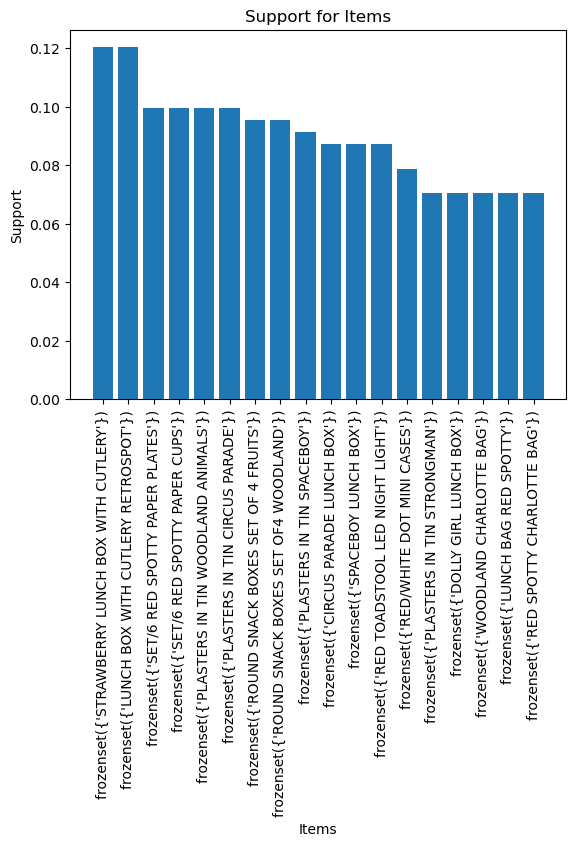

In [96]:
# Create the bar chart
plt.bar(items, support_values)

# Add labels and title
plt.xlabel('Items')
plt.ylabel('Support')
plt.title('Support for Items')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

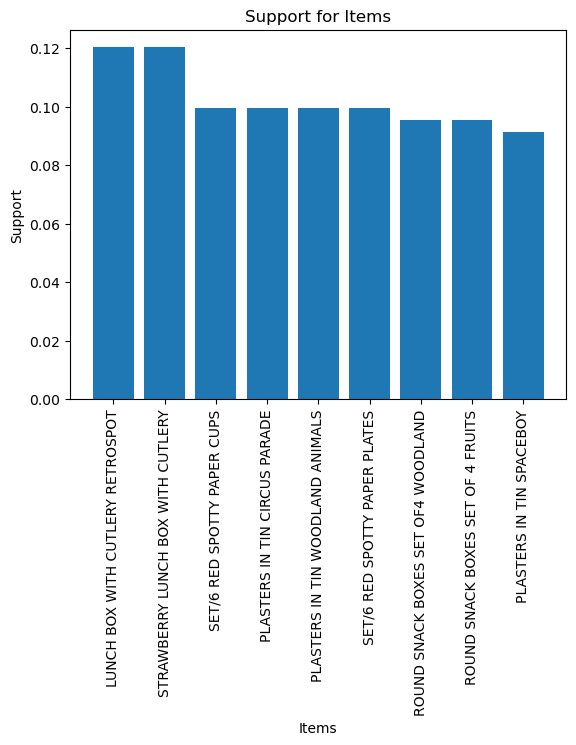

In [70]:
# Define the data
items = [list(rule)[0] for rule in top_rules.antecedents]
support_values = list(top_rules.support)

# Create the bar chart
plt.bar(items, support_values)

# Add labels and title
plt.xlabel('Items')
plt.ylabel('Support')
plt.title('Support for Items')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

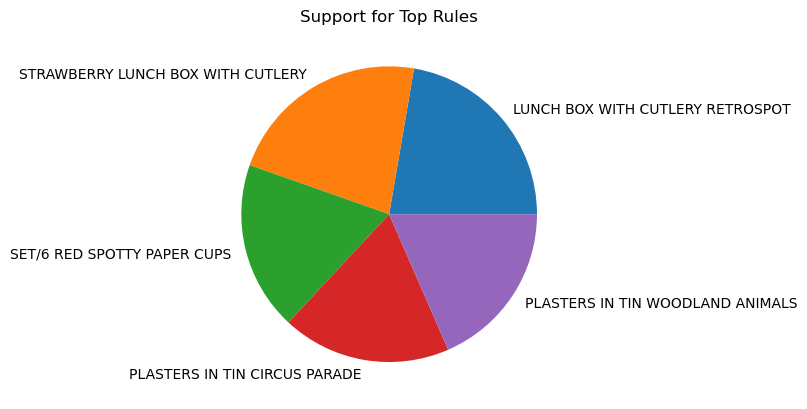

In [82]:
# Sort the rules based on support
rules = rules.sort_values(by="support", ascending=False)

# Choose the top 5 rules with the highest support
top_rules = rules.head(5)

# Define the data
support_values = list(top_rules.support)
labels = [', '.join(map(str, rule)) for rule in top_rules.antecedents]

# Create the pie plot
plt.pie(support_values, labels=labels)

# Add title
plt.title('Support for Top Rules')


# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

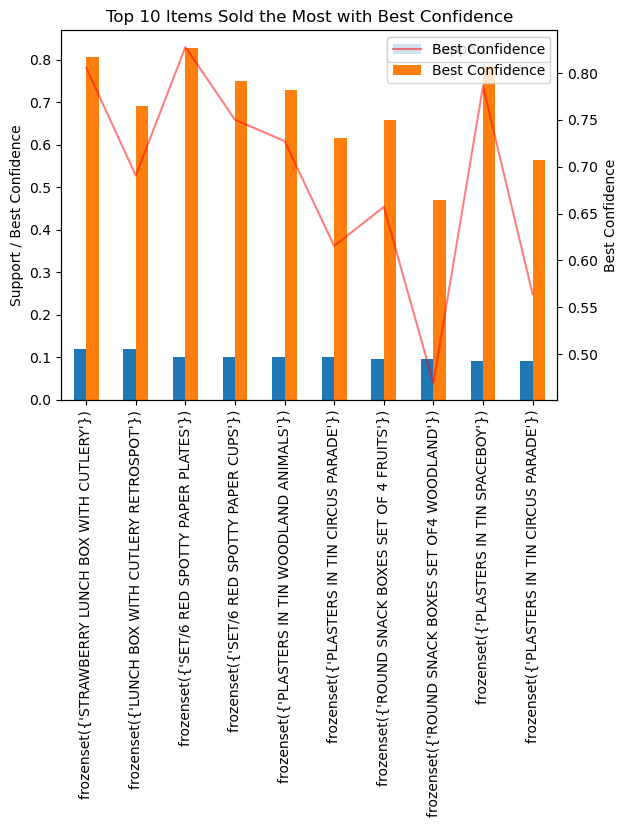

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the dataframe based on support and confidence
df = df.sort_values(by=["support", "confidence"], ascending=False)

# Select the top 10 items
top_items = df.antecedents[:10]

# Create a dataframe with the top 10 items, support, and best confidence
data = pd.DataFrame({'Item': top_items, 'Support': df.support[:10], 'Best Confidence': df.confidence[:10], 'Description': ['Item 1 description', 'Item 2 description', 'Item 3 description', 'Item 4 description', 'Item 5 description', 'Item 6 description', 'Item 7 description', 'Item 8 description', 'Item 9 description', 'Item 10 description']})

# Set the figure size and create the bar plot
plt.figure(figsize=(10, 6))
ax = data.plot(x='Item', kind='bar', rot=0)

# Add descriptions to the x-axis
ax.set_xticklabels(data['Description'], rotation=90)

# Add labels and title
ax.set_xlabel('')
ax.set_ylabel('Support / Best Confidence')
ax.set_title('Top 10 Items Sold the Most with Best Confidence')

# Add a second y-axis for Best Confidence
ax2 = ax.twinx()
data.plot(x='Item', y='Best Confidence', ax=ax2, color='red', alpha=0.5, rot=0)
ax2.set_ylabel('Best Confidence')

# Show the plot
plt.show()


# Machine Learning 

Predicting sales for items based on support so suppervised learning.